BRAINWAVE MATRIX SOLUTION TASK1- Data analysis on commerical store by Mrudula Kamdi

Step1- Importing libraries(importing the required libraries for analysis)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Step2- Data preparation(loading and checking first fews rows in a data)

In [22]:
# Load the data
data = pd.read_csv('C:\Users\ankit\OneDrive\Desktop', header=None)

# Display the first few rows of the dataframe
data.head()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2099384617.py, line 2)

Step3- Data Cleaning (finding missing values, incomplete values in a dataset and replace it will correct values)

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64


In [ ]:
# Drop rows with any missing values
data_cleaned = data.dropna()

In [ ]:
# Check for duplicates
duplicates = data_cleaned.duplicated().sum() 
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [ ]:
# Drop duplicate rows
data_cleaned = data_cleaned.drop_duplicates()

In [ ]:
# Display the cleaned data
data_cleaned.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


Step 4: Exploratory Data Analysis (EDA)
( some exploratory data analysis was performed to understand the sales trends)

Summary Statistics:
             Amount       Profit    Quantity
count   499.000000   499.000000  499.000000
mean    412.531062    37.072144    3.973948
std     555.409831   215.935070    2.302723
min       6.000000  -916.000000    1.000000
25%      50.000000   -25.000000    2.000000
50%     246.000000     7.000000    3.000000
75%     529.500000    71.500000    5.000000
max    5729.000000  1864.000000   14.000000


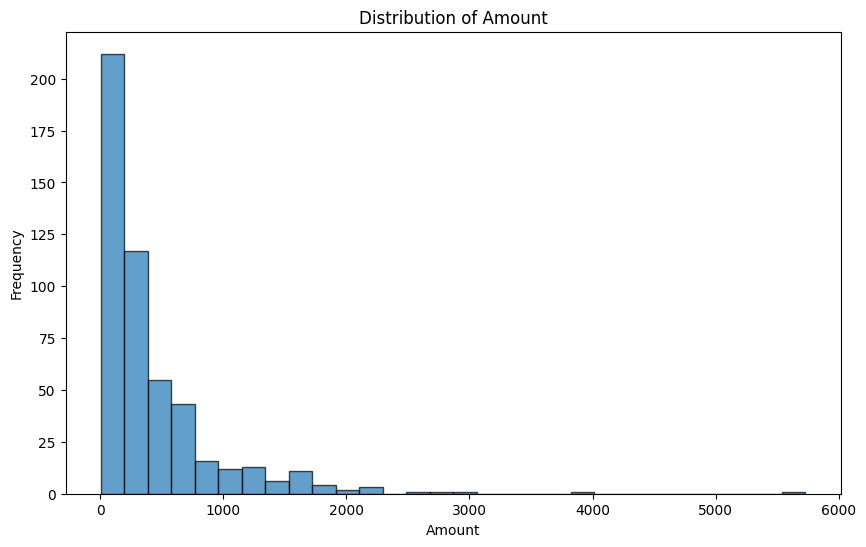

In [ ]:
# Summary statistics
summary_stats = data_cleaned.describe()
print("Summary Statistics:\n", summary_stats)

# Distribution of Amount
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['Amount'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

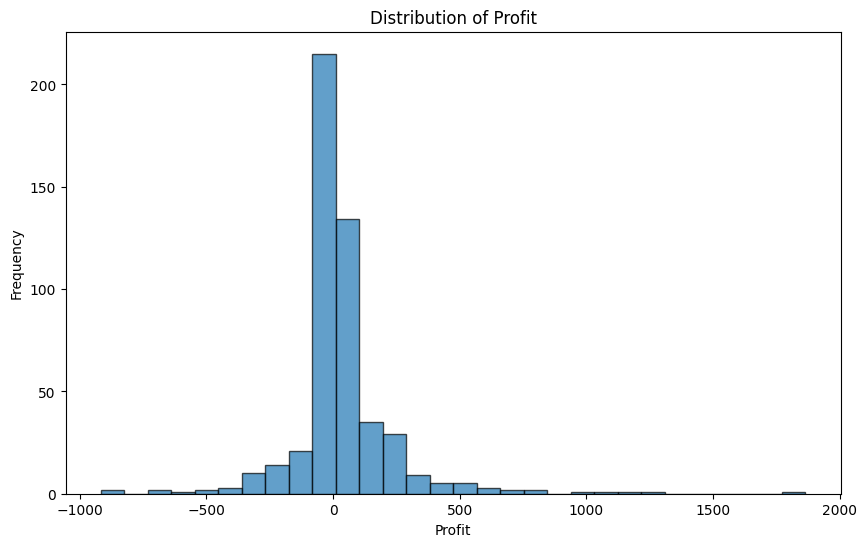

In [ ]:
# Distribution of Profit
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['Profit'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

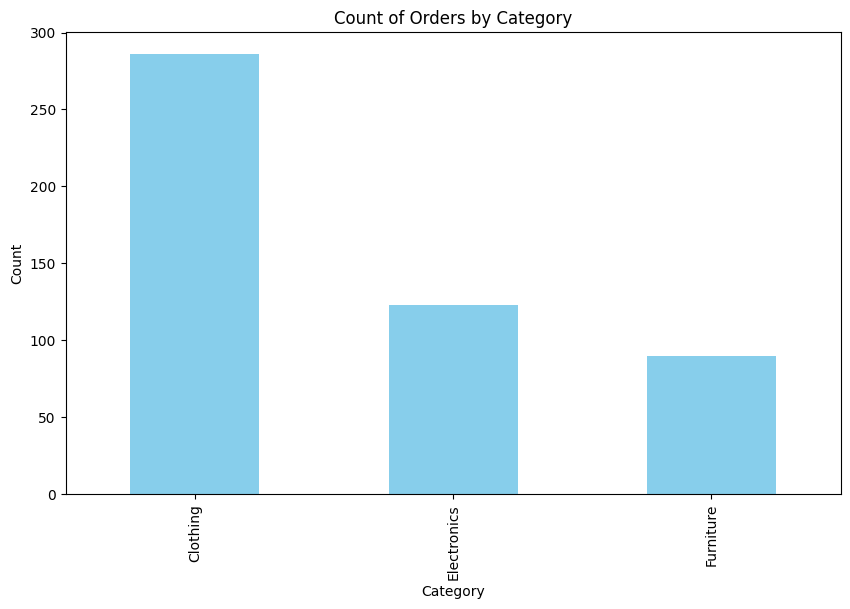

In [ ]:
# Count of orders by Category
plt.figure(figsize=(10, 6))
data_cleaned['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Count of Orders by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Step 5- Analysis and interpretation of results

In [ ]:
#1: Top Categories by Sales Amount
top_categories = data_cleaned.groupby('Category')['Amount'].sum().sort_values(ascending=False)
print("Top Categories by Sales Amount:\n", top_categories)


Top Categories by Sales Amount:
 Category
Electronics    86711
Furniture      63977
Clothing       55165
Name: Amount, dtype: int64


In [ ]:
# 2: Most Profitable Sub-Categories
top_sub_categories = data_cleaned.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
print("Most Profitable Sub-Categories:\n", top_sub_categories)

Most Profitable Sub-Categories:
 Sub-Category
Bookcases           4175
Tables              2910
Printers            2175
Saree               1961
Trousers            1819
Chairs              1690
Accessories         1608
Phones              1546
Stole                691
T-shirt              312
Hankerchief          275
Shirt                102
Leggings             -41
Kurti                -57
Skirt               -103
Electronic Games    -205
Furnishings         -359
Name: Profit, dtype: int64


In [ ]:
# 3: Payment Mode Preferences
payment_mode_counts = data_cleaned['PaymentMode'].value_counts()
print("Payment Mode Preferences:\n", payment_mode_counts)


Payment Mode Preferences:
 PaymentMode
COD            228
UPI             84
Credit Card     79
Debit Card      71
EMI             37
Name: count, dtype: int64


In [ ]:
# 4: Average Order Value by Category
avg_order_value = data_cleaned.groupby('Category')['Amount'].mean().sort_values(ascending=False)
print("Average Order Value by Category:\n", avg_order_value)

Average Order Value by Category:
 Category
Furniture      710.855556
Electronics    704.967480
Clothing       192.884615
Name: Amount, dtype: float64


In [ ]:
# 5: Profit Margin by Category
profit_margin = (data_cleaned.groupby('Category')['Profit'].sum() / data_cleaned.groupby('Category')['Amount'].sum()) * 100
profit_margin = profit_margin.sort_values(ascending=False)
print("Profit Margin by Category (%):\n", profit_margin)

Profit Margin by Category (%):
 Category
Furniture      13.154727
Clothing        8.989395
Electronics     5.909285
dtype: float64


Step 6: Insights and Findings
After visualizing the data, some insights were derived.

Top-Selling Products:
 Sub-Category
Saree               306
Hankerchief         220
Stole               171
Phones              169
Printers            158
Bookcases           131
Chairs              129
Electronic Games    121
Leggings             82
Shirt                79
Name: Quantity, dtype: int64


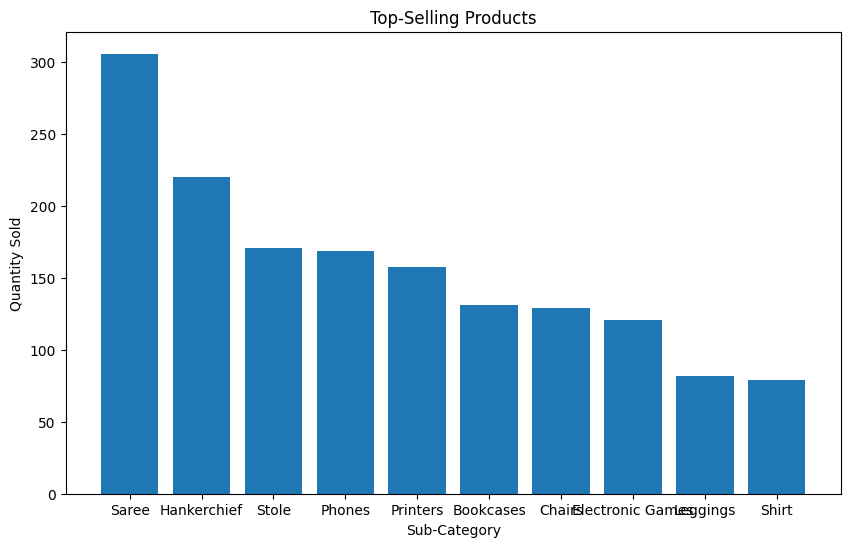

In [ ]:
# Analyze top-selling products
top_selling_products = data_cleaned.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top-Selling Products:\n", top_selling_products)

# Plot top-selling products
plt.figure(figsize=(10, 6))
plt.bar(x=top_selling_products.index, height=top_selling_products.values)
plt.title('Top-Selling Products')
plt.xlabel('Sub-Category')
plt.ylabel('Quantity Sold')
plt.show()

Category
Clothing       1110
Electronics     518
Furniture       355
Name: Quantity, dtype: int64


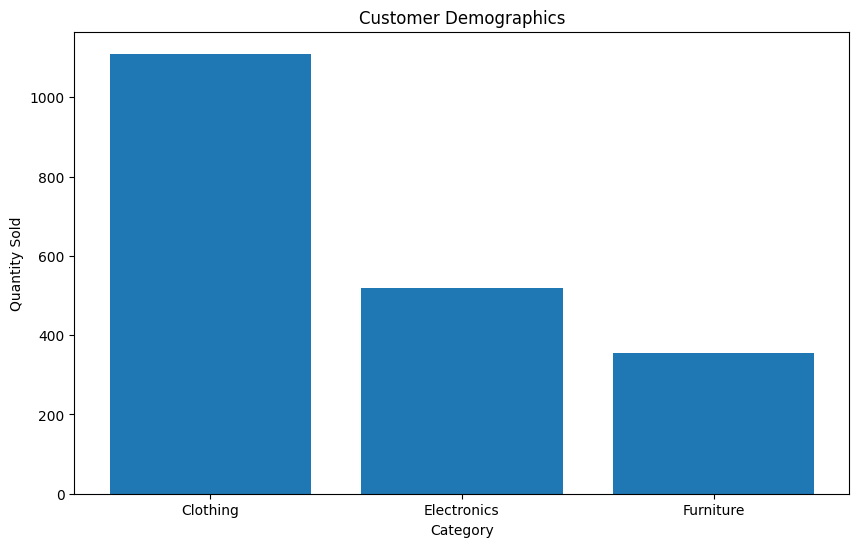

In [ ]:
# Analyze customer demographics (assuming 'Category' represents customer demographics)
customer_demographics = data_cleaned.groupby('Category')['Quantity'].sum().sort_values(ascending=False).head(10)
print(customer_demographics)

# Plot customer demographics
plt.figure(figsize=(10,6))
plt.bar(x=customer_demographics.index, height=customer_demographics.values)
plt.title('Customer Demographics')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.show()

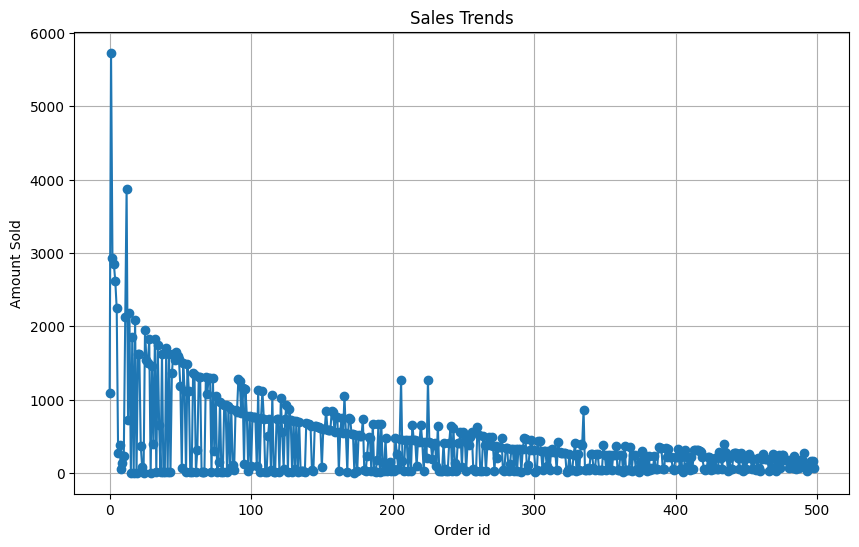

In [ ]:
# Plot sales trends
plt.figure(figsize=(10,6))
plt.plot( data_cleaned['Amount'], marker='o')
plt.title('Sales Trends')
plt.xlabel('Order id')
plt.ylabel('Amount Sold')
plt.grid(True)
plt.show()

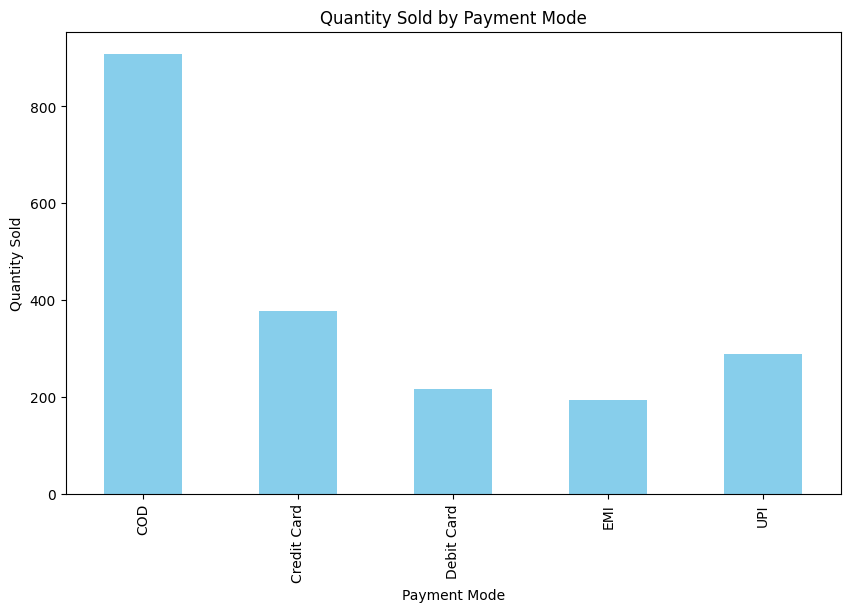

In [ ]:
# Group by PaymentMode and sum the Quantity
payment_mode_quantity = data_cleaned.groupby('PaymentMode')['Quantity'].sum()

# Plot the bar graph
plt.figure(figsize=(10, 6))
payment_mode_quantity.plot(kind='bar', color='skyblue')
plt.title('Quantity Sold by Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Quantity Sold')
plt.show()

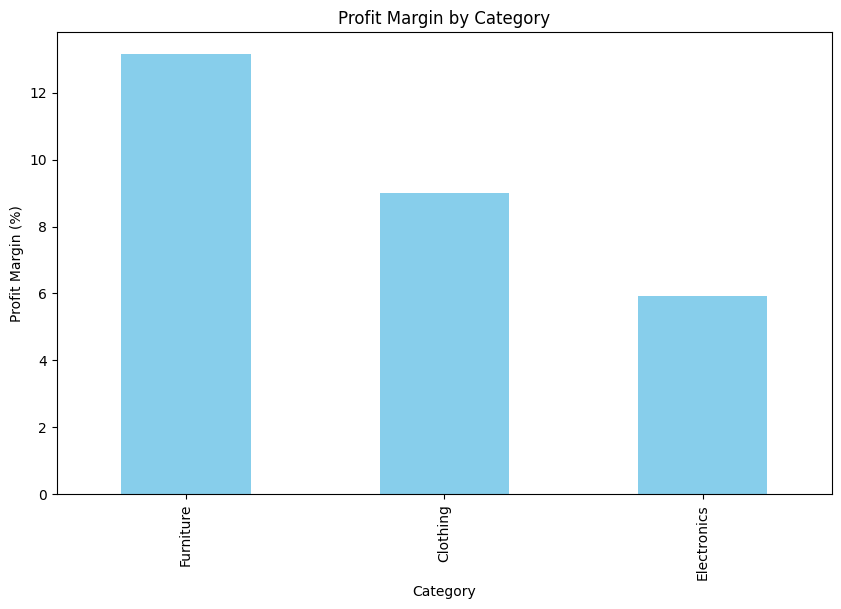

In [ ]:
# Plot profit margin by category
plt.figure(figsize=(10, 6))
profit_margin.plot(kind='bar', color='skyblue')
plt.title('Profit Margin by Category')
plt.xlabel('Category')
plt.ylabel('Profit Margin (%)')
plt.show()